Model: Input Loan data + FED data -> For each month after loan origination, output a probability for continuation, prepayment, or default. 

Disclaimer: Code written with assistance with Perplexity AI for error correction and basic code generation. 

In [1]:
#Manipulating Prosper Loan Data to Recover Prepayment and Default Information
import pandas as pd

file_path = 'prosperLoanData.csv' 
df = pd.read_csv(file_path)
df.head()

#Clean up time objects
df['ListingCreationDate'] = pd.to_datetime(df['ListingCreationDate'],  format='mixed').dt.date
df['ClosedDate'] = pd.to_datetime(df['ClosedDate'],  format='mixed').dt.date

#Eliminate loans that were cancelled or late payment less than 60 days, as these are not relevant for our analysis of prepayment and default risk.
df = df[~df['LoanStatus'].isin(['Cancelled', 'Past Due (1-15 days)', 'Past Due (31-60 days)', 'Past Due (16-30 days)',  'Past Due (61-90 days)', 'Past Due (91-120 days)', 'Past Due (>120 days)', 'Past Due (181-360 days)', 'Past Due (16-30 days)', 'Past Due (31-60 days)', 'Past Due ( days)', 'Past Due (Over 720 days)', 'FinalPaymentInProgress'])]

#Create a column to determine if a loan was prepaid
df['CompletedLoans'] = df['LoanStatus'].isin(['Completed'])
df['Prepayment'] = df['CompletedLoans'] & ((pd.to_datetime(df['ClosedDate']) - pd.to_datetime(df['LoanOriginationDate'])).dt.days / 30 < df['Term']-1)
#Create a column to indicate if a loan was prepaid
df['IsPrepaid'] = df['Prepayment'].astype(int)

#If a loan was prepaid, change the loan status to 'Prepaid'
df.loc[df['IsPrepaid'] == 1, 'LoanStatus'] = 'Prepaid'

#Create a new column that codifies the loan status. 
#Assign 0 for Current Loans, 1 for Completed Loans, 2 for Defaulted Loans, and 3 for Prepaid Loans.
def categorize_loan_status(status):
    if status in ['Current']:
        return 0
    elif status in ['Completed', 'FinalPaymentInProgress']:
        return 1
    elif status in ['Defaulted', 'Chargedoff']:
        return 2
    elif status in ['Prepaid']:
        return 3
    else:
        return -1  # For any other statuses not covered above

df['LoanStatusCategory'] = df['LoanStatus'].apply(categorize_loan_status)
df.head(25)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,CompletedLoans,Prepayment,IsPrepaid,LoanStatusCategory
0,1021339766868145413AB3B,193129,2007-08-26,C,36,Prepaid,2009-08-14,0.16516,0.1580,0.1380,...,0.00,1.0000,0,0,0.0,258,True,True,1,3
1,10273602499503308B223C1,1209647,2014-02-27,NaN,36,Current,NaT,0.12016,0.0920,0.0820,...,0.00,1.0000,0,0,0.0,1,False,False,0,0
2,0EE9337825851032864889A,81716,2007-01-05,HR,36,Completed,2009-12-17,0.28269,0.2750,0.2400,...,0.00,1.0000,0,0,0.0,41,True,False,0,1
3,0EF5356002482715299901A,658116,2012-10-22,NaN,36,Current,NaT,0.12528,0.0974,0.0874,...,0.00,1.0000,0,0,0.0,158,False,False,0,0
4,0F023589499656230C5E3E2,909464,2013-09-14,NaN,36,Current,NaT,0.24614,0.2085,0.1985,...,0.00,1.0000,0,0,0.0,20,False,False,0,0
5,0F05359734824199381F61D,1074836,2013-12-14,NaN,60,Current,NaT,0.15425,0.1314,0.1214,...,0.00,1.0000,0,0,0.0,1,False,False,0,0
6,0F0A3576754255009D63151,750899,2013-04-12,NaN,36,Current,NaT,0.31032,0.2712,0.2612,...,0.00,1.0000,0,0,0.0,1,False,False,0,0
7,0F1035772717087366F9EA7,768193,2013-05-05,NaN,36,Current,NaT,0.23939,0.2019,0.1919,...,0.00,1.0000,0,0,0.0,1,False,False,0,0
8,0F043596202561788EA13D5,1023355,2013-12-02,NaN,36,Current,NaT,0.07620,0.0629,0.0529,...,0.00,1.0000,0,0,0.0,1,False,False,0,0
9,0F043596202561788EA13D5,1023355,2013-12-02,NaN,36,Current,NaT,0.07620,0.0629,0.0529,...,0.00,1.0000,0,0,0.0,1,False,False,0,0


In [2]:
#Create a column that indicates how many months it took to repay or default a loan
df['MonthsToRepayOrDefault'] = ((pd.to_datetime(df['ClosedDate']) - pd.to_datetime(df['LoanOriginationDate'])).dt.days / 30).fillna(-1)
#Round MonthsTORepayOrDefault to nearest integer
df['MonthsToRepayOrDefault'] = df['MonthsToRepayOrDefault'].round()


#Look at the loan that defaulted with a negative MonthsToRepayOrDefault
df[(df['MonthsToRepayOrDefault'] < 0) & (df['LoanStatusCategory'] == 2)]
#throw this single data point out as a missed input
df = df.drop(df[(df['MonthsToRepayOrDefault'] < 0) & (df['LoanStatusCategory'] == 2)].index)
#Check that the data point has been removed
df[(df['MonthsToRepayOrDefault'] < 0) & (df['LoanStatusCategory'] == 2)]


#Check that only current loans have a negative MonthsToRepayOrDefault
df[df['MonthsToRepayOrDefault'] < 0]['LoanStatus'].value_counts()

#Value count for each event
df['LoanStatusCategory'].value_counts()




LoanStatusCategory
0    56576
3    27484
2    17009
1    10590
Name: count, dtype: int64

In [3]:
#We want to make sure that there is no data on months for current/prepaid/defaulted loans past their last observed month. 
import pandas as pd
import numpy as np

as_of_date = pd.to_datetime("2014-03-10")
df["ListingCreationDate"] = pd.to_datetime(df["ListingCreationDate"])

df["MonthsFromOrigToAsOf"] = ((as_of_date.year - df["ListingCreationDate"].dt.year) * 12 + 
                              (as_of_date.month - df["ListingCreationDate"].dt.month))

df["LastObservedMonth"] = np.where(
    df["LoanStatusCategory"].isin([2, 3]),  
    df["MonthsToRepayOrDefault"],                    
    df["MonthsFromOrigToAsOf"]              
)

for month in range(1, 37):
    col_name = f"Month_{month}"
    event_indicator = np.zeros(len(df), dtype=float)
    prepay_mask = (df["LoanStatusCategory"] == 3) & (df["MonthsToRepayOrDefault"] == month)
    default_mask = (df["LoanStatusCategory"] == 2) & (df["MonthsToRepayOrDefault"] == month)
    
    event_indicator[prepay_mask] = 1
    event_indicator[default_mask] = 2
    
    # Now NaN assignment works
    censored_mask = df["LastObservedMonth"] < month
    event_indicator[censored_mask] = np.nan
    
    df[col_name] = event_indicator

df.head()



,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,Month_27,Month_28,Month_29,Month_30,Month_31,Month_32,Month_33,Month_34,Month_35,Month_36
0,1021339766868145413AB3B,193129,2007-08-26,C,36,Prepaid,2009-08-14,0.16516,0.1580,0.1380,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10273602499503308B223C1,1209647,2014-02-27,NaN,36,Current,NaT,0.12016,0.0920,0.0820,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0EE9337825851032864889A,81716,2007-01-05,HR,36,Completed,2009-12-17,0.28269,0.2750,0.2400,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0EF5356002482715299901A,658116,2012-10-22,NaN,36,Current,NaT,0.12528,0.0974,0.0874,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0F023589499656230C5E3E2,909464,2013-09-14,NaN,36,Current,NaT,0.24614,0.2085,0.1985,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#Forcing full scroll view...
import pandas as pd

# Show ALL columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Also prevent truncation of column contents
pd.set_option('display.max_colwidth', None)
pd.set_option('display.width', None)

# For cleaner output
pd.set_option('display.precision', 2)


df.head()


,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,CompletedLoans,Prepayment,IsPrepaid,LoanStatusCategory,MonthsToRepayOrDefault,MonthsFromOrigToAsOf,LastObservedMonth,Month_1,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,Month_13,Month_14,Month_15,Month_16,Month_17,Month_18,Month_19,Month_20,Month_21,Month_22,Month_23,Month_24,Month_25,Month_26,Month_27,Month_28,Month_29,Month_30,Month_31,Month_32,Month_33,Month_34,Month_35,Month_36
0,1021339766868145413AB3B,193129,2007-08-26,C,36,Prepaid,2009-08-14,0.17,0.16,0.14,NaN,NaN,NaN,NaN,NaN,NaN,0,CO,Other,Self-employed,2.0,True,True,NaN,2007-08-26 18:41:46.780000000,640.0,659.0,2001-10-11 00:00:00,5.0,4.0,12.0,1,24.0,3.0,3.0,2.0,472.0,4.0,0.0,0.0,0.0,0.00,1500.0,11.0,0.81,0.0,0.17,"$25,000-49,999",True,3083.33,E33A3400205839220442E84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,78,19141,9425,2007-09-12 00:00:00,Q3 2007,1F3E3376408759268057EDA,330.43,11396.14,9425.00,1971.14,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258,True,True,1,3,23.0,79,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10273602499503308B223C1,1209647,2014-02-27,NaN,36,Current,NaT,0.12,0.09,0.08,0.08,0.02,0.05,6.0,A,7.0,2,CO,Professional,Employed,44.0,False,False,NaN,2014-02-27 08:28:14,680.0,699.0,1996-03-18 00:00:00,14.0,14.0,29.0,13,389.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,3989.0,0.21,10266.0,29.0,1.00,2.0,0.18,"$50,000-74,999",True,6125.00,9E3B37071505919926B1D82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,134815,10000,2014-03-03 00:00:00,Q1 2014,1D13370546739025387B2F4,318.93,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1,False,False,0,0,-1.0,1,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0EE9337825851032864889A,81716,2007-01-05,HR,36,Completed,2009-12-17,0.28,0.28,0.24,NaN,NaN,NaN,NaN,NaN,NaN,0,GA,Other,Not available,NaN,False,True,783C3371218786870A73D20,2007-01-02 14:09:10.060000000,480.0,499.0,2002-07-27 00:00:00,NaN,NaN,3.0,0,0.0,0.0,1.0,1.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06,Not displayed,True,2083.33,6954337960046817851BCB2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,86,6466,3001,2007-01-17 00:00:00,Q1 2007,5F7033715035555618FA612,123.32,4186.63,3001.00,1185.63,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41,True,False,0,1,36.0,86,86.0,0.0,0.0,0.0,0.0,0.0,0.0

In [5]:
#Compute counts and percentages for each event type
event_counts = df['LoanStatusCategory'].value_counts()
event_percentages = df['LoanStatusCategory'].value_counts(normalize=True) * 100

# Print the counts and percentages
print("0 represents current loans, 3 represents prepaid loans, 2 represents defaulted loans, and 1 represents completed loans")
print("Event Counts:\n", event_counts)
print("\nEvent Percentages:\n", event_percentages)

#Used for evaluating event balance. 


0 represents current loans, 3 represents prepaid loans, 2 represents defaulted loans, and 1 represents completed loans
Event Counts:
 LoanStatusCategory
0    56576
3    27484
2    17009
1    10590
Name: count, dtype: int64

Event Percentages:
 LoanStatusCategory
0    50.67
3    24.61
2    15.23
1     9.48
Name: proportion, dtype: float64


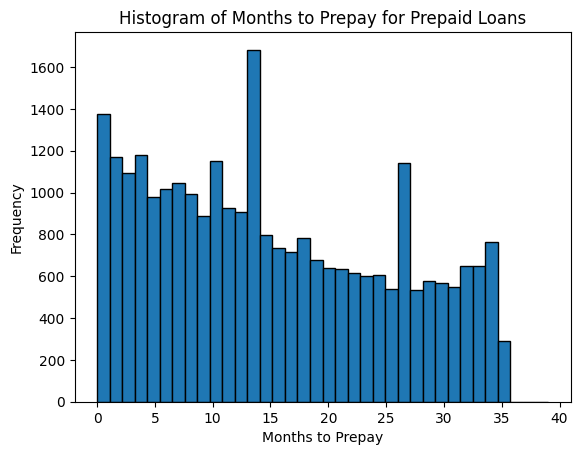

In [6]:
#Plot histograms for how many months for prepaid loans only
import matplotlib.pyplot as plt

prepaid_loans = df[df['LoanStatusCategory'] == 3]
plt.hist(prepaid_loans['MonthsToRepayOrDefault'], bins=36, edgecolor='black')
plt.title('Histogram of Months to Prepay for Prepaid Loans')
plt.xlabel('Months to Prepay')
plt.ylabel('Frequency')
plt.show()

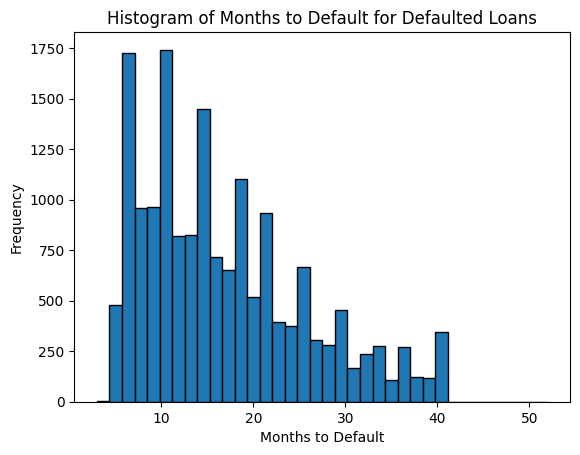

In [7]:
#Create histogram for how many months for defaults only
default_loans = df[df['LoanStatusCategory'] == 2]
plt.hist(default_loans['MonthsToRepayOrDefault'], bins=36, edgecolor='black')
plt.title('Histogram of Months to Default for Defaulted Loans')
plt.xlabel('Months to Default')
plt.ylabel('Frequency')
plt.show()

In [8]:
# 1. Confirm event timing aligns with status
print("Event timing by status:")
print(df.groupby("LoanStatusCategory")["MonthsToRepayOrDefault"].describe())

# 2. Summary of censoring
print("\nCensoring distribution:")
print(df[df["LoanStatusCategory"] == 0]["LastObservedMonth"].describe())

# 3. Event counts by month (using your Month_* columns)
event_counts = pd.DataFrame({col: df[col].value_counts().sort_index() 
                            for col in [f"Month_{i}" for i in range(1,37) if f"Month_{i}" in df.columns]})
print("\nEvents by month:\n", event_counts)

Event timing by status:
                      count   mean    std   min   25%   50%    75%   max
LoanStatusCategory                                                      
0                   56576.0  -1.00   0.00  -1.0  -1.0  -1.0  -1.00  -1.0
1                   10590.0  34.89   6.34  11.0  36.0  37.0  37.00  41.0
2                   17009.0  16.85   8.95   3.0  10.0  15.0  22.00  52.0
3                   27484.0  15.27  10.11   0.0   7.0  14.0  23.25  39.0

Censoring distribution:
count    56576.00
mean         9.71
std          8.55
min          0.00
25%          3.00
50%          7.00
75%         14.00
max         45.00
Name: LastObservedMonth, dtype: float64

Events by month:
       Month_1   Month_2  Month_3  Month_4  Month_5  Month_6  Month_7  Month_8  \
0.0  109398.0  103994.0    97376    91180    85359    79161    73463    68976   
1.0     965.0    1168.0     1093     1179      977     1017     1045      994   
2.0       NaN       NaN        1        3      480      778      94

In [9]:
#Import in FED rate data
import pandas as pd
import numpy as np

fed_df = pd.read_csv("FEDFUNDS (1).csv") 
fed_df["observation_date"] = pd.to_datetime(fed_df["observation_date"])
fed_df = fed_df.sort_values("observation_date").drop_duplicates("observation_date").reset_index(drop=True)

print("FED data preview:")
print(fed_df.head())


FED data preview:
  observation_date  FEDFUNDS
0       1954-07-01      0.80
1       1954-08-01      1.22
2       1954-09-01      1.07
3       1954-10-01      0.85
4       1954-11-01      0.83


In [10]:
# 3-class: 0=current/completed, 1=default, 2=prepay 
df["Event36"] = np.where(df["LoanStatusCategory"].isin([0,1]), 0,
                        np.where(df["LoanStatusCategory"] == 2, 1, 2))

print("Target distribution:")
print(df["Event36"].value_counts(normalize=True))


Target distribution:
Event36
0    0.60
2    0.25
1    0.15
Name: proportion, dtype: float64


In [11]:
print("Data quality check:")
print(f"Zero/negative APR loans: {sum(df['BorrowerRate'] <= 0)} / {len(df)}")
print(f"APR range: {df['BorrowerRate'].min():.4f} to {df['BorrowerRate'].max():.4f}")
print(f"LastObservedMonth range: {df['LastObservedMonth'].min()} to {df['LastObservedMonth'].max()}")
print(f"Sample Month_12 events: {df['Month_12'].value_counts()}")

Data quality check:
Zero/negative APR loans: 8 / 111659
APR range: 0.0000 to 0.4975
LastObservedMonth range: 0.0 to 100.0
Sample Month_12 events: Month_12
0.0    52576
1.0      909
2.0      821
Name: count, dtype: int64


Fitting Random Forests

In [ ]:
#This cell - expect 10-15 minute run time on 16gb RAM machine

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import average_precision_score
import joblib

# ===== 1. FED PREP =====
fed_df = pd.read_csv("FEDFUNDS (1).csv")
fed_df["observation_date"] = pd.to_datetime(fed_df["observation_date"])
#Calculate fed rate at loan origin for each loan. 
fed_monthly = fed_df.set_index('observation_date').resample('MS').interpolate('linear').ffill()
fed_dict = fed_monthly['FEDFUNDS'].to_dict()
print(f"FED ready: {len(fed_dict)} months")

# ===== 2. MONTHLY DATAFRAME =====
#Add month-by-month data for each loan, including the borrower rate, FED rate, spread/incentive info, and previous 3 month FED change.


monthly_rows = []
zero_apr_loans = 0

for idx, loan in df.iterrows():
    borrower_apr = loan['BorrowerRate']
    #Throw out "weird" loans with zero or negative APR
    if borrower_apr <= 0:  
        zero_apr_loans += 1
        continue

    #Only add info on last observed month
    last_month = int(loan['LastObservedMonth'])
    #Gather data on each month since loan origination
    for month in range(1, min(37, last_month + 1)):
        month_date = loan['ListingCreationDate'] + pd.DateOffset(months=month-1)
        #retrieve fed rate for this month 
        fed_now = fed_dict.get(month_date, 0.02)
        
        # Look at the FED rate 3 months prior (capturing some volatility)
        fed_3mo_ago_date = month_date - pd.DateOffset(months=3)
        fed_3mo_ago = fed_dict.get(fed_3mo_ago_date, fed_now)
        
        #Calculate the borrower's incentive to refinance this month
        apr_fed_spread = borrower_apr - fed_now
        #Compare with 3 months ago
        apr_fed_spread_change = (borrower_apr - fed_3mo_ago) - apr_fed_spread
        #Calculate fed change
        fed_change_3m = fed_now - fed_3mo_ago
        
        #Add all info into month-by-month dataframe. 
        monthly_rows.append({
            'loan_id': idx,
            'cohort_year': loan['ListingCreationDate'].year,
            'month_since_orig': month,
            'status_next': loan[f'Month_{month}'],
            'apr_fed_spread': apr_fed_spread,
            'apr_fed_spread_change_3m': apr_fed_spread_change,
            'apr_fed_spread_pct': apr_fed_spread / borrower_apr,
            'fed_change_3m': fed_change_3m,
            'fed_level': fed_now,
            'borrower_apr': borrower_apr,
            'loan_amount_log': np.log1p(loan.get('LoanOriginalAmount', 10000))
        })

monthly_df = pd.DataFrame(monthly_rows)
print(f"Dataset: {len(monthly_df):,} loan-months ({zero_apr_loans} zero-APR skipped)")
print("Events:", dict(monthly_df['status_next'].value_counts()))



# ===== 3. RANDOM FOREST MODELS =====
#No train/test split yet - Random Forest does internal bootstrapping. Cross validation and temporal splits in next sections. 
#Month-by-month features
features = ['month_since_orig', 'apr_fed_spread', 'apr_fed_spread_change_3m', 
           'apr_fed_spread_pct', 'fed_change_3m', 'fed_level', 'borrower_apr', 'loan_amount_log']

#Drop the non-observed months
risk_df = monthly_df[monthly_df['status_next'].notna()]

# Default hazard - fit a random tree on the loans that default or continue (no prepayment)
def_data = risk_df[risk_df['status_next'].isin([0,1])]
rf_default = RandomForestClassifier(n_estimators=300, class_weight={0:1, 1:25}, max_depth=7, 
                                   min_samples_leaf=100, random_state=42, n_jobs=-1)
rf_default.fit(def_data[features], (def_data['status_next'] == 1).astype(int))

# Prepay hazard - fit a random tree on the loans that prepay or continue (no default)
prepay_data = risk_df[risk_df['status_next'].isin([0,2])]
rf_prepay = RandomForestClassifier(n_estimators=300, class_weight={0:1, 1:6}, max_depth=7, 
                                  min_samples_leaf=100, random_state=42, n_jobs=-1)
rf_prepay.fit(prepay_data[features], (prepay_data['status_next'] == 2).astype(int))

# ===== 4. RESULTS =====
print("\n Surface Performance:")
def_score = average_precision_score((risk_df['status_next']==1).astype(int), 
                                   rf_default.predict_proba(risk_df[features])[:,1])
prepay_score = average_precision_score((risk_df['status_next']==2).astype(int), 
                                      rf_prepay.predict_proba(risk_df[features])[:,1])
print(f"Default PR-AUC: {def_score:.3f}")
print(f"Prepay PR-AUC:  {prepay_score:.3f}")

print("\n Main Features - Prepayment:")
prepay_imp = pd.Series(rf_prepay.feature_importances_, index=features).sort_values(ascending=False)
print(prepay_imp.round(3))

print("\n Main Features - Default:")
default_imp = pd.Series(rf_default.feature_importances_, index=features).sort_values(ascending=False)
print(default_imp.round(3))

FED ready: 787 months
Dataset: 1,624,597 loan-months (8 zero-APR skipped)
Events: {0.0: np.int64(1581206), 1.0: np.int64(27065), 2.0: np.int64(16326)}

 Surface Performance:
Default PR-AUC: 0.032
Prepay PR-AUC:  0.027

 Main Features - Prepayment:
month_since_orig            5.12e-01
borrower_apr                1.58e-01
apr_fed_spread              1.45e-01
apr_fed_spread_pct          1.33e-01
loan_amount_log             3.90e-02
fed_level                   5.00e-03
fed_change_3m               4.00e-03
apr_fed_spread_change_3m    3.00e-03
dtype: float64

 Main Features - Default:
month_since_orig            5.59e-01
borrower_apr                1.20e-01
loan_amount_log             1.15e-01
apr_fed_spread              1.01e-01
apr_fed_spread_pct          8.70e-02
fed_level                   8.00e-03
apr_fed_spread_change_3m    5.00e-03
fed_change_3m               5.00e-03
dtype: float64


In [14]:
#Cross Validation with temporal splits

import numpy as np

# ===== 1. MANUAL TEMPORAL CV: Expanding Window by Cohort Year=====
# Get clean integer years
cohort_years = sorted(monthly_df['cohort_year'].dropna().unique().astype(int).tolist())
print(f"Available cohort years: {cohort_years}")

# Expanding window splits: Train early → Test later
splits = [
    (cohort_years[:4], [cohort_years[4]]),   # 2005-08 → 2009
    (cohort_years[:5], [cohort_years[5]]),   # 2005-09 → 2010
    (cohort_years[:6], [cohort_years[6]]),   # 2005-10 → 2011
    (cohort_years[:7], [cohort_years[7]])    # 2005-11 → 2012
]

monthly_df_sorted = monthly_df.sort_values('cohort_year').reset_index(drop=True)

print("\n Temporal Expanding Window CV:")
for fold, (tr_yrs, te_yrs) in enumerate(splits, 1):
    tr_mask = monthly_df_sorted['cohort_year'].isin(tr_yrs)
    te_mask = monthly_df_sorted['cohort_year'].isin(te_yrs)
    print(f"Fold {fold}: Train {tr_yrs} → Test {te_yrs} | "
          f"Train: {tr_mask.sum():,}, Test: {te_mask.sum():,}")

# ===== 2. CV EVALUATION =====
cv_def, cv_prepay = [], []
for fold, (tr_yrs, te_yrs) in enumerate(splits):
    tr_df = monthly_df_sorted[monthly_df_sorted['cohort_year'].isin(tr_yrs)]
    te_df = monthly_df_sorted[monthly_df_sorted['cohort_year'].isin(te_yrs)]
    
    # === DEFAULT MODEL ===
    def_tr = tr_df[tr_df['status_next'].isin([0,1])]
    if len(def_tr) < 1000:
        print(f"Fold {fold+1}: Skip default (train n={len(def_tr):,})")
        def_score = np.nan
    else:
        rf_def_cv = RandomForestClassifier(
            n_estimators=200, class_weight={0:1, 1:25}, max_depth=7,
            min_samples_leaf=50, random_state=42+fold, n_jobs=-1
        )
        rf_def_cv.fit(def_tr[features], (def_tr['status_next']==1).astype(int))
        
        def_te = te_df[te_df['status_next'].isin([0,1])]
        if len(def_te) > 100:
            def_score = average_precision_score(
                (def_te['status_next']==1).astype(int),
                rf_def_cv.predict_proba(def_te[features])[:,1]
            )
            cv_def.append(def_score)
        else:
            def_score = np.nan
    
    # === PREPAY MODEL ===
    prepay_tr = tr_df[tr_df['status_next'].isin([0,2])]
    #throw out folds with too few prepay events
    if len(prepay_tr) < 1000:
        print(f"Fold {fold+1}: Skip prepay (train n={len(prepay_tr):,})")
        prepay_score = np.nan
    else:
        rf_prepay_cv = RandomForestClassifier(
            n_estimators=200, class_weight={0:1, 1:6}, max_depth=7,
            min_samples_leaf=50, random_state=42+fold, n_jobs=-1
        )
        rf_prepay_cv.fit(prepay_tr[features], (prepay_tr['status_next']==2).astype(int))
        
        prepay_te = te_df[te_df['status_next'].isin([0,2])]
        if len(prepay_te) > 100:
            prepay_score = average_precision_score(
                (prepay_te['status_next']==2).astype(int),
                rf_prepay_cv.predict_proba(prepay_te[features])[:,1]
            )
            cv_prepay.append(prepay_score)
        else:
            prepay_score = np.nan
    
    def_display = f"{def_score:.3f}" if not np.isnan(def_score) else 'N/A'
    prepay_display = f"{prepay_score:.3f}" if not np.isnan(prepay_score) else 'N/A'
    print(f"Fold {fold+1}: Def {def_display} | Prep {prepay_display}")

# ===== 3. FINAL RESULTS =====
print("\n" + "="*50)
if cv_def:
    print(f"TEMPORAL CV RESULTS")
    print(f"   Default PR-AUC:  {np.mean(cv_def):.3f} ± {np.std(cv_def)*2:.3f} ({len(cv_def)} folds)")
if cv_prepay:
    print(f"   Prepay PR-AUC:   {np.mean(cv_prepay):.3f} ± {np.std(cv_prepay)*2:.3f} ({len(cv_prepay)} folds)")


Available cohort years: [2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014]

 Temporal Expanding Window CV:
Fold 1: Train [2005, 2006, 2007, 2008] → Test [2009] | Train: 659,683, Test: 52,361
Fold 2: Train [2005, 2006, 2007, 2008, 2009] → Test [2010] | Train: 712,044, Test: 128,946
Fold 3: Train [2005, 2006, 2007, 2008, 2009, 2010] → Test [2011] | Train: 840,990, Test: 232,863
Fold 4: Train [2005, 2006, 2007, 2008, 2009, 2010, 2011] → Test [2012] | Train: 1,073,853, Test: 306,502
Fold 1: Def 0.036 | Prep 0.012
Fold 2: Def 0.033 | Prep 0.012
Fold 3: Def 0.028 | Prep 0.015
Fold 4: Def 0.022 | Prep 0.016

TEMPORAL CV RESULTS
   Default PR-AUC:  0.030 ± 0.011 (4 folds)
   Prepay PR-AUC:   0.014 ± 0.004 (4 folds)


In [17]:
# ===== STEP 1: Train Final Models =====
print("\n=== TRAINING FINAL MODELS ===")

# Train finals on CV data only (2005-2012)
train_mask = monthly_df['cohort_year'] <= 2012

def_data_final = risk_df[(risk_df['status_next'].isin([0,1])) & train_mask]
prepay_data_final = risk_df[(risk_df['status_next'].isin([0,2])) & train_mask]

print(f"Final train cohorts - Default: {sorted(def_data_final['cohort_year'].unique())}")
print(f"Final train cohorts - Prepay:  {sorted(prepay_data_final['cohort_year'].unique())}")


# Default model 
rf_default_final = RandomForestClassifier(
    n_estimators=500, class_weight={0:1, 1:25},
    max_depth=8, min_samples_leaf=100, n_jobs=-1, random_state=42, oob_score=True
)

rf_default_final.fit(def_data_final[features], (def_data_final['status_next'] == 1).astype(int))

# Prepay model
rf_prepay_final = RandomForestClassifier(
    n_estimators=500, class_weight={0:1, 1:6},
    max_depth=8, min_samples_leaf=100, n_jobs=-1, random_state=42, oob_score=True
)
rf_prepay_final.fit(prepay_data_final[features], (prepay_data_final['status_next'] == 2).astype(int))


# ===== STEP 2: HOLD-OUT TEST 2013-2014 =====
print("\n=== 2013-2014 HOLD-OUT TEST ===")
holdout_df = monthly_df[monthly_df['cohort_year'].isin([2013, 2014])].copy()
print(f"Holdout size: {len(holdout_df):,} loan-months")

# Default test
def_holdout = holdout_df[holdout_df['status_next'].isin([0,1])]
def_proba = rf_default_final.predict_proba(def_holdout[features])[:,1]
def_holdout_auc = average_precision_score((def_holdout['status_next']==1).astype(int), def_proba)
print(f"Default PR-AUC (2013-14): {def_holdout_auc:.3f}")

# Prepay test  
prepay_holdout = holdout_df[holdout_df['status_next'].isin([0,2])]
prepay_proba = rf_prepay_final.predict_proba(prepay_holdout[features])[:,1]
prepay_holdout_auc = average_precision_score((prepay_holdout['status_next']==2).astype(int), prepay_proba)
print(f"Prepay PR-AUC (2013-14):  {prepay_holdout_auc:.3f}")

print("\nEvent rates:")
print(holdout_df['status_next'].value_counts(normalize=True).round(4))

# ===== COMPARISON TABLE =====
print("\n" + "="*40)
print("PERFORMANCE SUMMARY")
print("="*40)
print(f"{'Metric':<12} {'Full-Data':<10} {'Temporal CV':<12} {'Holdout'}")
print(f"{'Default':<12} {0.032:<10} {0.030:<12} {def_holdout_auc:.3f}")
print(f"{'Prepay':<12}  {0.027:<10}  {0.014:<12}  {prepay_holdout_auc:.3f}")
print("="*40)



=== TRAINING FINAL MODELS ===
Final train cohorts - Default: [np.int64(2005), np.int64(2006), np.int64(2007), np.int64(2008), np.int64(2009), np.int64(2010), np.int64(2011), np.int64(2012)]
Final train cohorts - Prepay:  [np.int64(2005), np.int64(2006), np.int64(2007), np.int64(2008), np.int64(2009), np.int64(2010), np.int64(2011), np.int64(2012)]

=== 2013-2014 HOLD-OUT TEST ===
Holdout size: 244,242 loan-months
Default PR-AUC (2013-14): 0.010
Prepay PR-AUC (2013-14):  0.007

Event rates:
status_next
0.0    9.90e-01
1.0    8.60e-03
2.0    1.30e-03
Name: proportion, dtype: float64

PERFORMANCE SUMMARY
Metric       Full-Data  Temporal CV  Holdout
Default      0.032      0.03         0.010
Prepay        0.027       0.014         0.007


In [18]:
# HOLD-OUT LIFT
holdout_df['def_prob'] = rf_default_final.predict_proba(holdout_df[features])[:,1]
holdout_df['def_decile'] = pd.qcut(holdout_df['def_prob'], 10, duplicates='drop')
holdout_lift = holdout_df.groupby('def_decile')['status_next'].mean()
print("Holdout Default Lift:")
print(holdout_lift.round(3))


Holdout Default Lift:
def_decile
(0.154, 0.219]    7.00e-03
(0.219, 0.224]    9.00e-03
(0.224, 0.23]     9.00e-03
(0.23, 0.234]     8.00e-03
(0.234, 0.239]    1.20e-02
(0.239, 0.244]    1.20e-02
(0.244, 0.251]    1.40e-02
(0.251, 0.268]    1.00e-02
(0.268, 0.293]    1.70e-02
(0.293, 0.651]    1.50e-02
Name: status_next, dtype: float64


C:\Users\Thisu\AppData\Local\Temp\ipykernel_12376\263350160.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  holdout_lift = holdout_df.groupby('def_decile')['status_next'].mean()


In [19]:
# PREPAY LIFT CHART 
holdout_df['prepay_prob'] = rf_prepay_final.predict_proba(holdout_df[features])[:,1]
holdout_df['prepay_decile'] = pd.qcut(holdout_df['prepay_prob'], 10, duplicates='drop')
prepay_lift = holdout_df.groupby('prepay_decile')['status_next'].apply(
    lambda x: (x==2).mean()
)
print("Holdout Prepay Lift:")
print(prepay_lift.round(4))


Holdout Prepay Lift:
prepay_decile
(0.00091, 0.00529]    0.00e+00
(0.00529, 0.00693]    0.00e+00
(0.00693, 0.00767]    0.00e+00
(0.00767, 0.00865]    0.00e+00
(0.00865, 0.0108]     1.00e-04
(0.0108, 0.014]       0.00e+00
(0.014, 0.0299]       5.00e-04
(0.0299, 0.0581]      1.30e-03
(0.0581, 0.0981]      4.00e-03
(0.0981, 0.203]       7.10e-03
Name: status_next, dtype: float64


C:\Users\Thisu\AppData\Local\Temp\ipykernel_12376\1886211049.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  prepay_lift = holdout_df.groupby('prepay_decile')['status_next'].apply(


In [20]:
from scipy.stats import ks_2samp
good = holdout_df[holdout_df['status_next']==0]['def_prob']
bad = holdout_df[holdout_df['status_next']==1]['def_prob']
ks_stat = ks_2samp(good, bad).statistic
print(f"KS Statistic: {ks_stat:.3f}") 


KS Statistic: 0.046


In [24]:
# === PREPAY KS TEST ===
good_prepay = holdout_df[holdout_df['status_next']==0]['prepay_prob']
bad_prepay = holdout_df[holdout_df['status_next']==2]['prepay_prob']
ks_prepay = ks_2samp(good_prepay, bad_prepay).statistic
print(f"Prepay KS Statistic: {ks_prepay:.3f}")

Prepay KS Statistic: 0.675


In [27]:
configs = [
    {'max_depth': None, 'min_samples_leaf': 30, 'class_weight': {0:1, 1:12}},
    {'max_depth': 15, 'min_samples_leaf': 50, 'class_weight': {0:1, 1:15}},
    {'max_depth': None, 'min_samples_leaf': 20, 'class_weight': {0:1, 1:10}}
]

for i, params in enumerate(configs):
    rf = RandomForestClassifier(n_estimators=300, random_state=42, **params)
    rf.fit(def_data_final[features], (def_data_final['status_next'] == 1).astype(int))
    
    proba = rf.predict_proba(holdout_df[features])[:,1]
    holdout_df[f'def_decile_{i}'] = pd.qcut(proba, 10, labels=False, duplicates='drop')
    
    lift_top = holdout_df.groupby(f'def_decile_{i}')['status_next'].mean().iloc[-1]
    lift_ratio = lift_top / holdout_df['status_next'].mean()
    print(f"Config {i}: Top={lift_top:.3%}, Lift={lift_ratio:.1f}x")


Config 0: Top=1.372%, Lift=1.2x


KeyboardInterrupt: 